### Project 3: Water Quality Prediction using Machine Learning

Author: Barbara Jean

Date: 08/10/2024

output: pdf_document

In [1]:
# Handling warnings as errors 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import autocorrelation_plot
from pandas import datetime
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from pandas import DataFrame
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
 

In [3]:
# Reading dataset
data=pd.read_csv("C:/Users/79bar/dsc_680/WaterQualityPrediction.csv")
water=pd.DataFrame(data)
print("The loading of the dataset was successful.\n")

The loading of the dataset was successful.



In [4]:
water.head() # Reading the first records by using the head() metho

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


### Data exploration

In [5]:
water.shape # Returning a tuple representing the dimensionality of the DataFrame

(1048575, 24)

In [6]:
water.size # Returning an int representing the number of elements in this object

25165800

In [7]:
water.info() # Printing a summary of the dataframe, index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Index                   1048575 non-null  int64  
 1   pH                      1028344 non-null  float64
 2   Iron                    1041584 non-null  float64
 3   Nitrate                 1029880 non-null  float64
 4   Chloride                1017741 non-null  float64
 5   Lead                    1043891 non-null  float64
 6   Zinc                    1020900 non-null  float64
 7   Color                   1047594 non-null  object 
 8   Turbidity               1039881 non-null  float64
 9   Fluoride                1015357 non-null  float64
 10  Copper                  1013693 non-null  float64
 11  Odor                    1017243 non-null  float64
 12  Sulfate                 1014050 non-null  float64
 13  Conductivity            1019772 non-null  float64
 14  Ch

In [8]:
water.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [9]:
water.describe() # looking at the statistical summary of the variables with describe()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,...,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,1.048575e+06,1.028344e+06,1.041584e+06,1.029880e+06,1.017741e+06,1.043891e+06,1.020900e+06,1.039881e+06,1.015357e+06,1.013693e+06,...,1.014050e+06,1.019772e+06,1.038413e+06,1.029236e+06,1.048277e+06,1.018887e+06,1.043272e+06,1.031026e+06,1.028214e+06,1.048575e+06
mean,5.242870e+05,7.449869e+00,1.139646e-01,6.078584e+00,1.818660e+02,1.291635e-03,1.528928e+00,4.835915e-01,9.410137e-01,4.939443e-01,...,1.446009e+02,4.248376e+02,3.236978e+00,9.352826e-02,2.647872e+02,1.915360e+01,6.003251e+01,1.573196e+01,1.149062e+01,2.295821e-01
std,3.026977e+05,8.478455e-01,4.433188e-01,3.131874e+00,6.576657e+01,3.030129e-02,1.505436e+00,8.614735e-01,7.924903e-01,5.662430e-01,...,6.672156e+01,1.897561e+02,7.150808e-01,4.403703e-01,1.543697e+02,1.137963e+01,1.808397e+01,8.798726e+00,6.925925e+00,4.205643e-01
min,0.000000e+00,2.058008e+00,2.050000e-53,2.861727e-01,2.941350e+01,0.000000e+00,6.350000e-07,1.410000e-14,4.550000e-06,2.100000e-09,...,1.194073e+01,1.305482e+01,9.994110e-01,1.380000e-46,1.064299e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,6.914812e+00,8.950000e-06,3.952811e+00,1.374347e+02,8.290000e-123,4.127921e-01,3.692472e-02,3.706065e-01,1.260900e-01,...,9.746143e+01,2.863260e+02,2.737515e+00,2.060000e-06,1.318069e+02,1.135982e+01,4.784209e+01,8.000000e+00,5.000000e+00,0.000000e+00
50%,5.242870e+05,7.452940e+00,2.054149e-03,5.564798e+00,1.747464e+02,1.520000e-62,1.074800e+00,1.997574e-01,7.654291e-01,3.389322e-01,...,1.339778e+02,3.970023e+02,3.198937e+00,5.372950e-04,2.635694e+02,1.646738e+01,6.002168e+01,1.600000e+01,1.100000e+01,0.000000e+00
75%,7.864305e+05,8.001406e+00,4.977795e-02,7.584930e+00,2.156446e+02,2.820000e-27,2.214154e+00,5.928613e-01,1.318265e+00,6.789152e-01,...,1.803459e+02,5.333383e+02,3.685177e+00,1.369394e-02,3.949597e+02,2.386571e+01,7.223478e+01,2.300000e+01,1.700000e+01,0.000000e+00
max,1.048574e+06,1.289196e+01,1.574860e+01,7.307293e+01,1.430549e+03,3.503948e+00,2.836867e+01,1.929611e+01,1.285171e+01,1.139056e+01,...,1.393433e+03,1.891516e+03,1.068842e+01,2.374086e+01,5.797995e+02,2.430051e+02,1.440785e+02,3.100000e+01,2.300000e+01,1.000000e+00


### Data cleaning

#### Convert strings to lower or proper case

In [10]:
# Declararing clean_headers function to clean columns names in data set
def clean_headers(val):
    if isinstance(val,str):
        val="".join(char for char in val if char.isalnum() or char in (" ","_"))
        val=val.strip().lower().replace(" ","_")
        return val
    else:
        return val


In [11]:
# Calling clean_headers function 
water= data.rename(columns=clean_headers)
water.head()

,index,ph,iron,nitrate,chloride,lead,zinc,color,turbidity,fluoride,...,chlorine,manganese,total_dissolved_solids,source,water_temperature,air_temperature,month,day,time_of_day,target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


#### Identify missing data


In [12]:
water.isnull().any() # Checking missing data

index                     False
ph                         True
iron                       True
nitrate                    True
chloride                   True
lead                       True
zinc                       True
color                      True
turbidity                  True
fluoride                   True
copper                     True
odor                       True
sulfate                    True
conductivity               True
chlorine                   True
manganese                  True
total_dissolved_solids     True
source                     True
water_temperature          True
air_temperature            True
month                      True
day                        True
time_of_day                True
target                    False
dtype: bool

In [13]:
water.isnull().sum() # Detecting missing value using interger

index                         0
ph                        20231
iron                       6991
nitrate                   18695
chloride                  30834
lead                       4684
zinc                      27675
color                       981
turbidity                  8694
fluoride                  33218
copper                    34882
odor                      31332
sulfate                   34525
conductivity              28803
chlorine                  10162
manganese                 19339
total_dissolved_solids      298
source                    15535
water_temperature         29688
air_temperature            5303
month                     16921
day                       17549
time_of_day               20361
target                        0
dtype: int64

In [14]:
# replacingv missing values with the mean value of the available data.
mean_value = water.mean()
mean_imputation = water.fillna(mean_value)

In [15]:
mean_imputation.isnull().sum() # Detecting missing value using interger

index                         0
ph                            0
iron                          0
nitrate                       0
chloride                      0
lead                          0
zinc                          0
color                       981
turbidity                     0
fluoride                      0
copper                        0
odor                          0
sulfate                       0
conductivity                  0
chlorine                      0
manganese                     0
total_dissolved_solids        0
source                    15535
water_temperature             0
air_temperature               0
month                     16921
day                           0
time_of_day                   0
target                        0
dtype: int64

In [16]:
# Dropping columns with missing values
df_water= mean_imputation.dropna(axis=1)
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   index                   1048575 non-null  int64  
 1   ph                      1048575 non-null  float64
 2   iron                    1048575 non-null  float64
 3   nitrate                 1048575 non-null  float64
 4   chloride                1048575 non-null  float64
 5   lead                    1048575 non-null  float64
 6   zinc                    1048575 non-null  float64
 7   turbidity               1048575 non-null  float64
 8   fluoride                1048575 non-null  float64
 9   copper                  1048575 non-null  float64
 10  odor                    1048575 non-null  float64
 11  sulfate                 1048575 non-null  float64
 12  conductivity            1048575 non-null  float64
 13  chlorine                1048575 non-null  float64
 14  ma

#### Find duplicates

The duplicated() method returns a Series with True and False values to show which rows in the DataFrame are duplicated and which are not. By default, if all the values in a row are the same, duplicated() considers the entire row as a duplicate. The method also considers the first occurrence of a row as unique, so it will always return False for the initial row, as a duplicate row won't appear until a subsequent occurrence.

In [17]:
df_water.duplicated() # Finding duplicate value in the data 

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [18]:
df_water.isnull().sum() 

index                     0
ph                        0
iron                      0
nitrate                   0
chloride                  0
lead                      0
zinc                      0
turbidity                 0
fluoride                  0
copper                    0
odor                      0
sulfate                   0
conductivity              0
chlorine                  0
manganese                 0
total_dissolved_solids    0
water_temperature         0
air_temperature           0
day                       0
time_of_day               0
target                    0
dtype: int64

### Data visualization

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'iron'}>,
        <AxesSubplot:title={'center':'nitrate'}>,
        <AxesSubplot:title={'center':'chloride'}>],
       [<AxesSubplot:title={'center':'lead'}>,
        <AxesSubplot:title={'center':'zinc'}>,
        <AxesSubplot:title={'center':'turbidity'}>,
        <AxesSubplot:title={'center':'fluoride'}>,
        <AxesSubplot:title={'center':'copper'}>],
       [<AxesSubplot:title={'center':'odor'}>,
        <AxesSubplot:title={'center':'sulfate'}>,
        <AxesSubplot:title={'center':'conductivity'}>,
        <AxesSubplot:title={'center':'chlorine'}>,
        <AxesSubplot:title={'center':'manganese'}>],
       [<AxesSubplot:title={'center':'total_dissolved_solids'}>,
        <AxesSubplot:title={'center':'water_temperature'}>,
        <AxesSubplot:title={'center':'air_temperature'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title

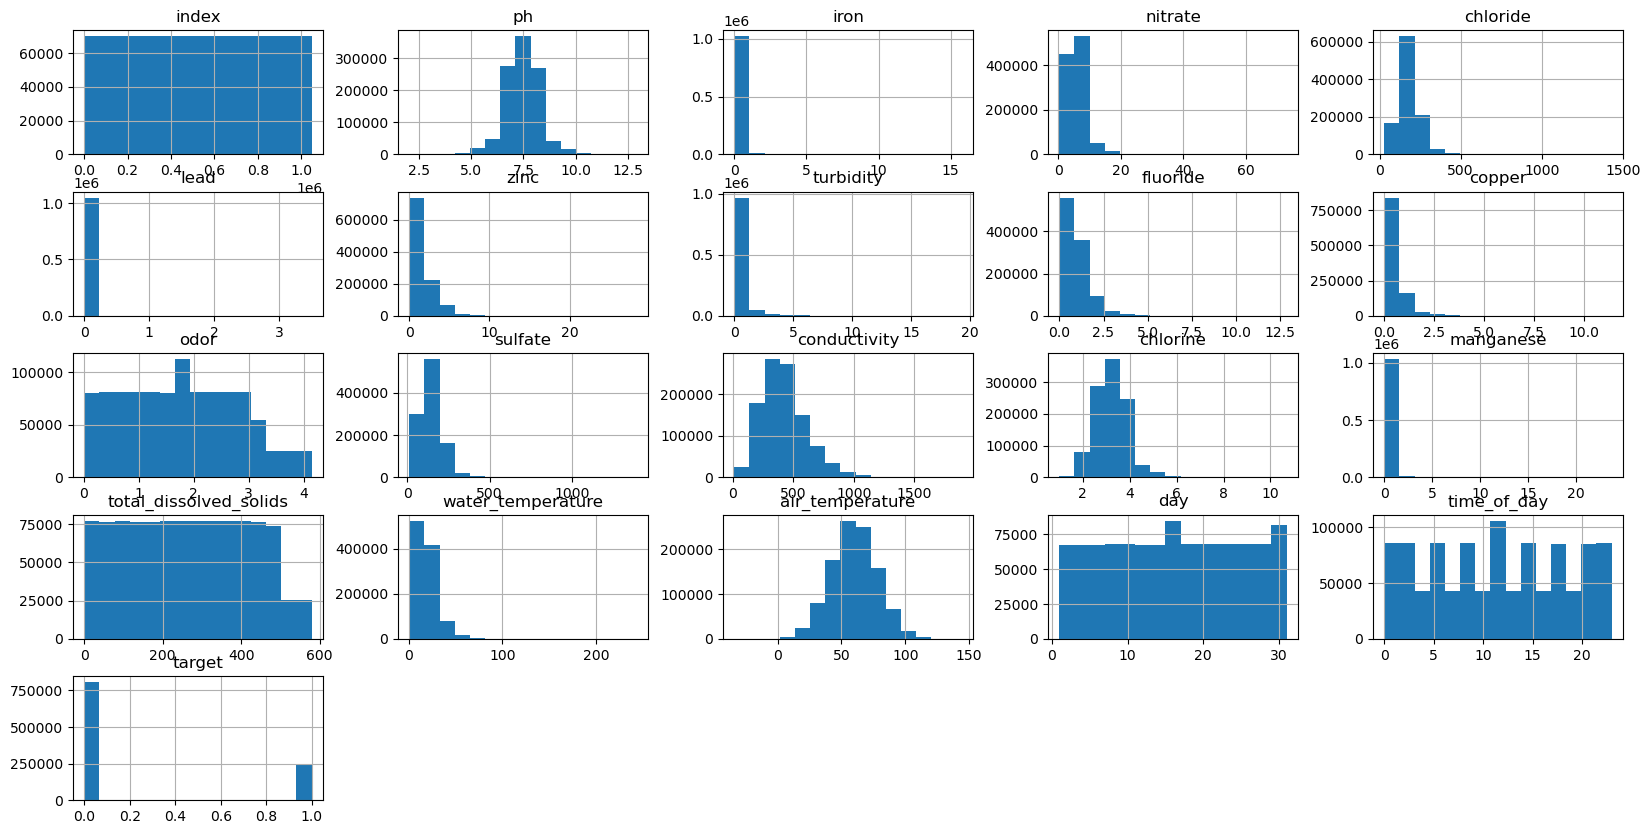

In [19]:
# Hist plots the values and their frequencies as a bar graph
df_water.hist(bins=15,figsize=(20,10))

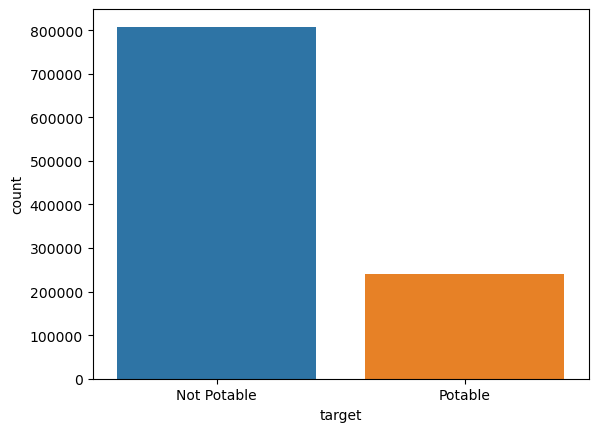

In [20]:
ax = sns.countplot(x = "target",data=df_water, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

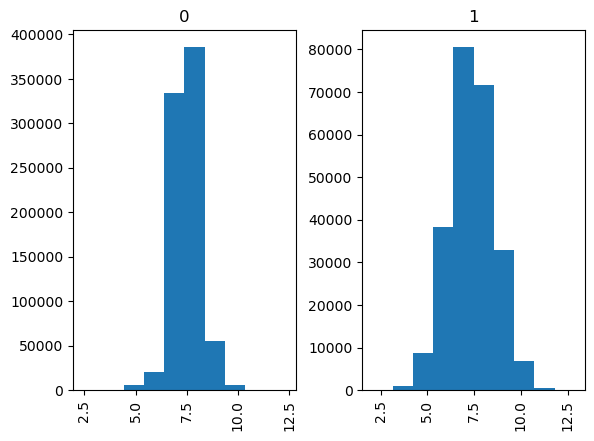

In [21]:
df_water.hist(column='ph', by='target') # Displaying 'ph' by 'target'

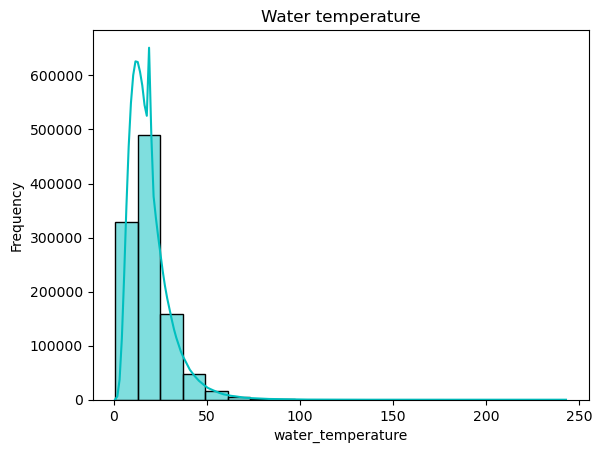

In [22]:
# Display water_temperature'
plt.figure()
sns.histplot(df_water['water_temperature'], bins=20, kde=True, color='c')
plt.title('Water temperature')
plt.xlabel('water_temperature')
plt.ylabel('Frequency')
plt.show()

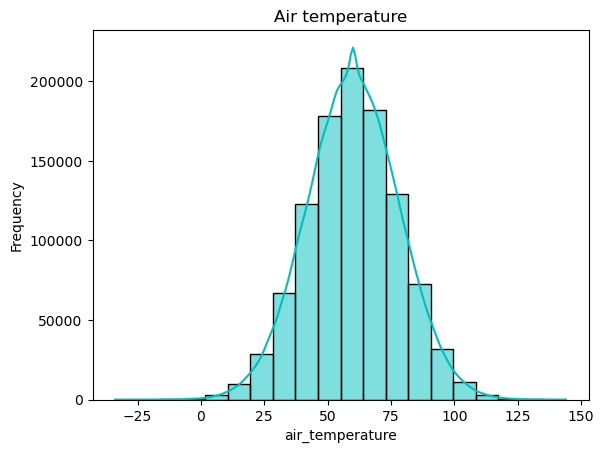

In [23]:
# Display water_temperature'
plt.figure()
sns.histplot(df_water['air_temperature'], bins=20, kde=True, color='c')
plt.title('Air temperature')
plt.xlabel('air_temperature')
plt.ylabel('Frequency')
plt.show()

### Performing feature engineering

Using the correlation matrix to find the highly correlated characteristics, we remove one of the two features from each highly correlated pair before dropping the highly collinear features. The drop() function can eliminate the features with high correlation from the dataframe after using the corr() function to compute the correlation matrix.

Using correlation is possible to measure the linear relationship between two or more variables. One variable can be predicted from another using correlation. Because good variables have a strong correlation with the target, correlation can be used to select features. Additionally, variables should not be associated with one another but with the aim.

<AxesSubplot:>

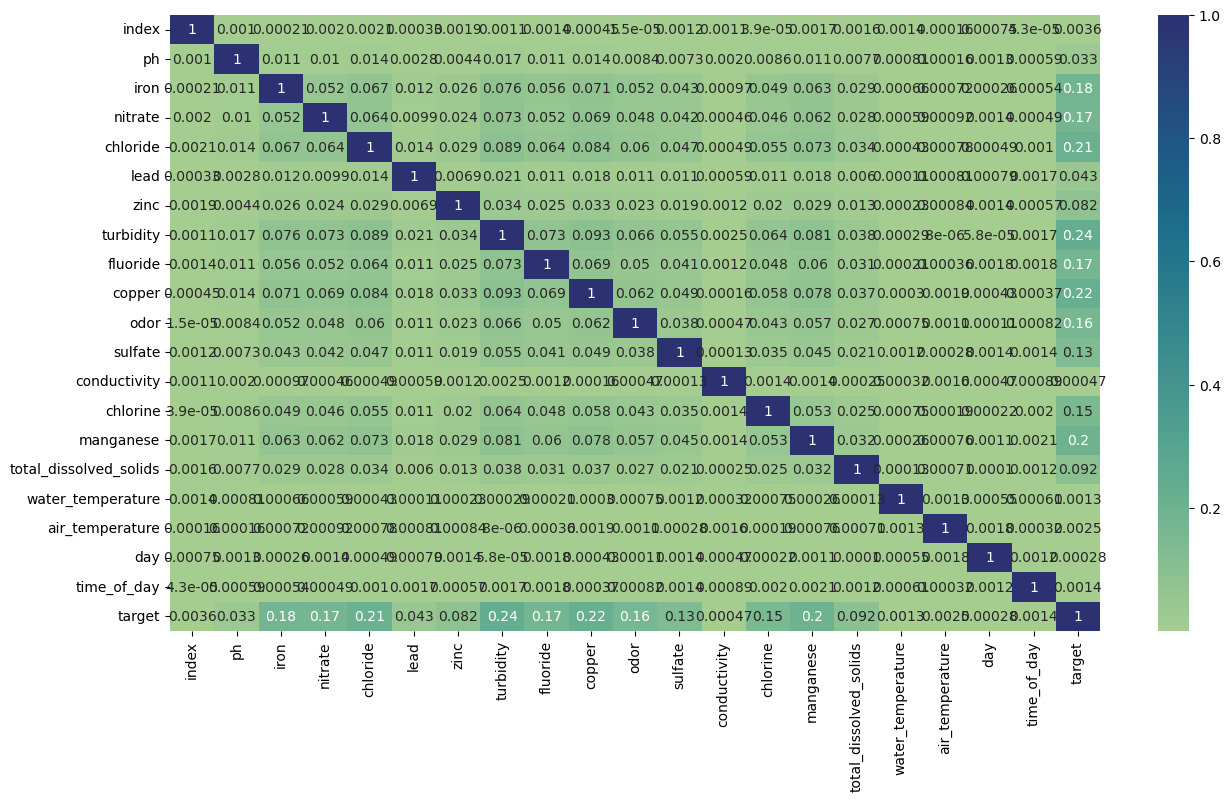

In [24]:
corr_Matrix=df_water.corr().abs()
plt.figure(figsize=(15,8))
sns.heatmap(corr_Matrix,annot=True,cmap="crest")

In [25]:
# Creating features and target
X=df_water.drop(['target'],axis=1)
y=df_water['target']

In [26]:
# Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((734002, 20), (314573, 20))

**Dimensionility reduction**

In [27]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [28]:
# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

In [29]:
# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [30]:
# Determine the number of components to keep for 85% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

In [31]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [32]:
# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)

Original Training Data Shape: (734002, 20)
Reduced Training Data Shape (PCA): (734002, 17)
Number of Components Selected: 17


In [33]:
df_water.columns

Index(['index', 'ph', 'iron', 'nitrate', 'chloride', 'lead', 'zinc',
       'turbidity', 'fluoride', 'copper', 'odor', 'sulfate', 'conductivity',
       'chlorine', 'manganese', 'total_dissolved_solids', 'water_temperature',
       'air_temperature', 'day', 'time_of_day', 'target'],
      dtype='object')

### Model Building and Evaluation

**1- Training the model by using Random Forest Classifier model**

In [34]:
# Creating an instance of the Random Forest classifier model class called rf
rf= RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [35]:
# Applying the model to make a prediction
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

**Evaluate the models**

In [36]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    acc= accuracy_score(y_true, y_pred)
    return mse, r2, acc

In [37]:
# Calling the evaluate_models function
mse_train, r2_train, acc_train= evaluate_model(y_train, y_rf_train_pred)
mse_test, r2_test,acc_test = evaluate_model(y_test, y_rf_test_pred)


In [38]:
print("Water Quality Prediction Train - MSE (Random Forest Classifier):", '%.2f' %mse_train)
print("Water Quality Prediction Train - R-squared (Random Forest Classifier):", '%.2f' %r2_train)
print("Water Quality Prediction Train - Accuracy(Random Forest Classifier):", '%.2f' %acc_train)

Water Quality Prediction Train - MSE (Random Forest Classifier): 0.23
Water Quality Prediction Train - R-squared (Random Forest Classifier): -0.30
Water Quality Prediction Train - Accuracy(Random Forest Classifier): 0.77


In [39]:
print("Water Quality Prediction Test - MSE (Random Forest Classifier):", '%.2f' %mse_test)
print("Water Quality Prediction Test - R-squared (Random Forest Classifier):", '%.2f' %r2_test)
print("Water Quality Prediction Test - Accuracy(Random Forest Classifier):", '%.2f' %acc_test)

Water Quality Prediction Test - MSE (Random Forest Classifier): 0.23
Water Quality Prediction Test - R-squared (Random Forest Classifier): -0.30
Water Quality Prediction Test - Accuracy(Random Forest Classifier): 0.77


**2- Training the model by using Decision Tree Classifier model**

In [40]:
# Initializing the decision tree classifier
dtc = DecisionTreeClassifier( max_depth=4, random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

**Evaluate the model**

In [41]:
# Predicting the target variable for the test set
y_pred = dtc.predict(X_test) 
# Computing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", '%.2f'%accuracy) # Printing the result

Accuracy: 0.89


In [42]:
# Creating the confusion matrix of the model
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n") # Printing the result
print(confusion_matrix)

Confusion Matrix:

[[227237  15190]
 [ 19900  52246]]


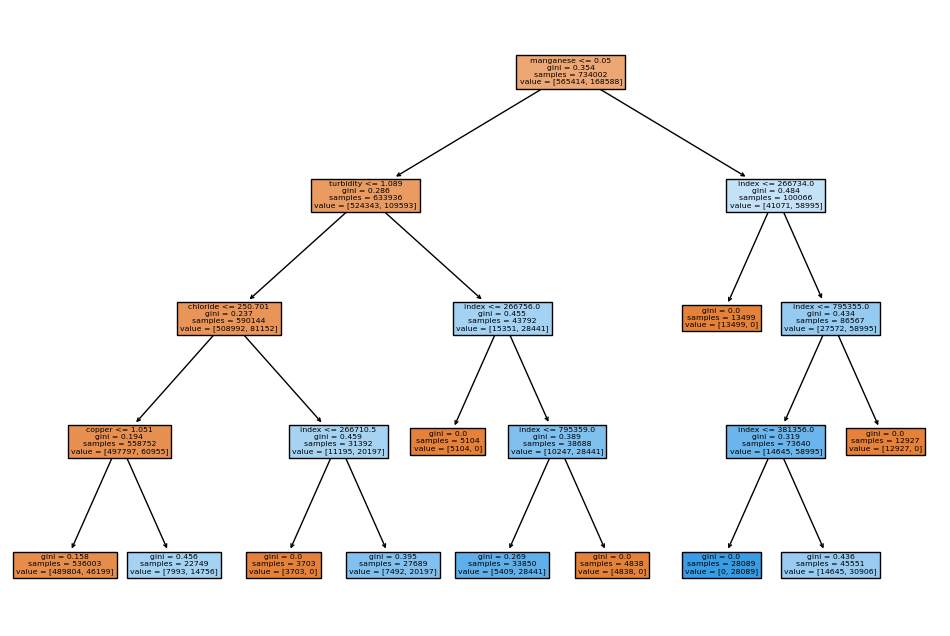

In [43]:
# Create a visualization of the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, feature_names=X.columns) # plot_tree()method allows to produce figure of the tree
plt.show()

**3- Training the model by using Logistic Regression model**

In [44]:
# Training the logistic regression model on the training data
lr_model = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

**Evaluate the model**

In [45]:
# Finding the accuracy of the logistic regression model on the test set using the "score" method.
accuracy = accuracy_score(y_test, lr_model.predict(X_test))
print('Accuracy:', '%.2f'%accuracy)

Accuracy: 0.77


In [50]:
# Computing precision, recall, F-measure and support for the test set predictions
precision, recall, f1, support = precision_recall_fscore_support(y_test, lr_model.predict(X_test))
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1)
print("Support:",support)

Precision: [0.77437798 0.56904134]
Recall: [0.99393632 0.02690378]
F1: [0.87052669 0.05137843]
Support: [242427  72146]


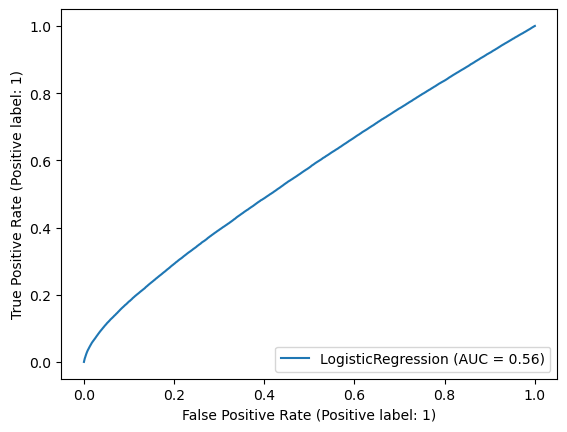

In [51]:
# Using the roc_curve () scikit-learn function for the model 
plot_roc_curve(lr_model, X_test, y_test)